# Logistic Regression Analysis #

From the data, we can see that the outcome of a game is binary: the winner is denoted by either a 0 (blue team) or a 1 (red team). Using the data from different aspects of the game, we want to be able to predict who will win the game. 

Because of the binary nature of the outcome we want to predict, we will use logistic regression to produce an output that will always be in between 0 and 1, and will allow it to correctly predict who will win.

## Import our setup code ##

In [1]:
from project_setup_code import *

In [2]:
%matplotlib inline

## Explore our data ##
A good indicator of how well your team is doing in a match is how many objectives your team has taken. These objectvies are:

* Tower kills: Towers are placed in each lane of the map and must be taken in order for your team to advance.
* Inhibitor kills: Inhibitors are placed in each team's base, and must be taken in order for your team to take the inner towers and eventually win the game.
* Dragon kills: The Dragon is a powerful neutral monster that gives you and your teammates 'buffs' and gold, which help establish a competitive edge over the other team.
* Baron kills: The Baron is the most powerful monster on the map that gives your team a very competitve edge over the other team.

We will use these as our source of data when predicting the outcome of each match.

### Let's see how each factor correlates with the outcome of the match ('winner') ###

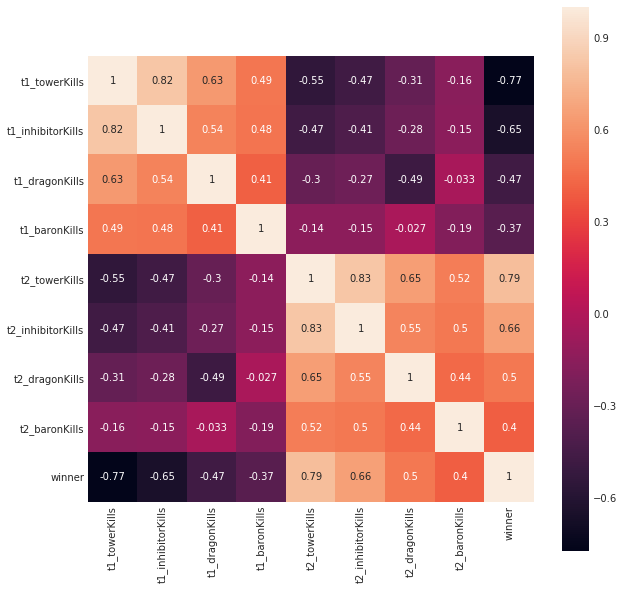

In [3]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data[['t1_towerKills','t1_inhibitorKills','t1_dragonKills','t1_baronKills',
                  't2_towerKills','t2_inhibitorKills','t2_dragonKills','t2_baronKills','winner']].corr(),annot=True,square=True)

From this heat map, we can see that the correlation for each objective is:
* towerKills: ~.78
* inhibitorKills: ~.65
* dragonKills: ~.49
* baronKills: ~.40

Given these numbers, our strongest model should come from looking at tower and inhibitor kills, but we will test the dragon and baron kills as well to be certain.

### Split the data ###
We want to split our data into a set that we train the model on and a set we test the model with. Using Scikit-learn, we can split our data so that we train on the majority (67%) and test the rest to see how we do.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data[['t1_baronKills', 't1_dragonKills', 't2_baronKills', 't2_dragonKills']]
y = data['winner']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Create and train model ###
With our data split, we can create a logistic regression model and fit it to our training data

In [7]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predictions = logmodel.predict(X_test)

### Evaluate our Model ###
Now that we have a model, we can see how well we predicted the outcomes of the matches

In [9]:
from sklearn.metrics import classification_report

In [10]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84      8754
          1       0.86      0.79      0.82      8253

avg / total       0.83      0.83      0.83     17007



Our model was right about 83% of the time. Not too bad, but we can do better!

### Now, let's try it with the tower and inhibitor kills data ###

In [11]:
X = data[['t1_towerKills','t1_inhibitorKills','t2_towerKills','t2_inhibitorKills']]
y = data['winner']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      8754
          1       0.96      0.95      0.95      8253

avg / total       0.96      0.96      0.96     17007



96% is much better! This shows that the number of towers and inhibitors a team takes is a much better indicator of whether or not they are going to win the match. Lastly, let's try combining all of these variables into one model, maybe it will yield slightly better results.

### Let's create a function to streamline the process from now on: ###

In [25]:
def logRegModel(X, y):
    '''
    X: data used to predict outcome
    y: outcome data
    
    function used to split data into train and test sections,
    create a logistic regression model, and train the model
    with the train data. Finally, the function will print
    a classification report to results.
    '''

    # Split the data (X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

    # Create and train model
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)

    # Evaluate the model
    print(classification_report(y_test, predictions))

In [27]:
X = data[['t1_baronKills', 't1_dragonKills', 't2_baronKills', 't2_dragonKills',
         't1_towerKills','t1_inhibitorKills','t2_towerKills','t2_inhibitorKills']]
y = data['winner']

In [28]:
logRegModel(X, y)

             precision    recall  f1-score   support

          0       0.97      0.94      0.96      8754
          1       0.94      0.97      0.95      8253

avg / total       0.96      0.96      0.96     17007



Not much changed, although it should be noted that the percentage of correctly guessing when teams won (97%) went up, while the percentage of correctly guessing when each team lost (94%) went down when compared to our previous model. 